# BOSTON HOUSING

## INTRODUCTION

In [42]:
# Importing libraries and loading data
import numpy as np
import pandas as pd

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

## DATA EXPLORATION

In [43]:
# Understanding the data
maximum = np.max(prices)
minimum = np.min(prices)
mean = np.mean(prices)
median = np.median(prices)
std = np.std(prices)

print("Some useful Statistics:\n")
print("Maximum price : ${:,.2f}".format(maximum))
print("Minimum price : ${:,.2f}".format(minimum))
print("Mean of prices : ${:,.2f}".format(mean))
print("Median of prices : ${:,.2f}".format(median))
print("Standard deviation from prices : ${:,.2f}".format(std))

Some useful Statistics:

Maximum price : $1,024,800.00
Minimum price : $105,000.00
Mean of prices : $454,342.94
Median of prices : $438,900.00
Standard deviation from prices : $165,171.13


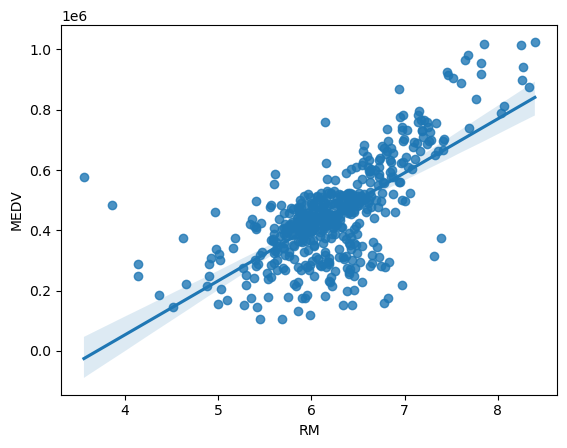

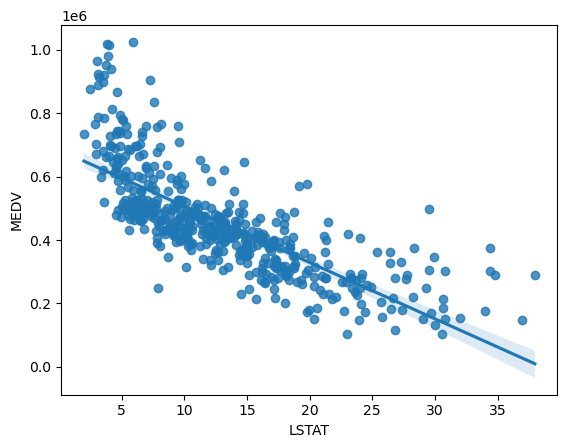

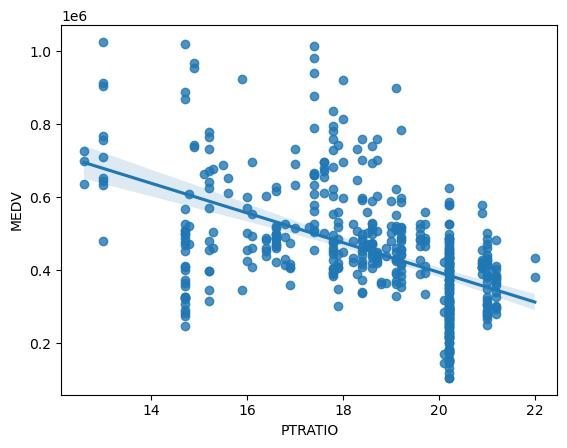

In [44]:
# Visualising relation of prices to other features
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(x=data[var], y=prices)
    plt.show()

## PERFORMANCE METRIC

In [45]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def metric(true, pred):
    score = r2_score(true, pred)

    return score

In [46]:
import warnings
warnings.filterwarnings("ignore")  # suppress warnings

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=100)

## MODEL BUILDING AND EVALUATING

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    cv_sets = ShuffleSplit(X.shape[0], test_size=0.20, random_state=0)

    regressor = DecisionTreeRegressor()
    params = {'max_depth' : range(1, 11)}
    scoring_function = make_scorer(metric)

    grid = GridSearchCV(regressor, params, scoring=scoring_function, cv=cv_sets)
    grid.fit(X, y)

    return grid.best_estimator_

In [49]:
reg = fit_model(X_train, y_train)
print(reg.get_params()['max_depth'])

4


In [50]:
# A Client data matrix
client_data = [[5, 17, 15],
               [4, 32, 22],
               [8, 3, 12]]

# Predictions
for i, price in enumerate(reg.predict(client_data)):
    print("House prices for {}'s home: ${:,.2f}".format(i+1, price))

House prices for 1's home: $401,333.33
House prices for 2's home: $240,947.37
House prices for 3's home: $893,700.00
